# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

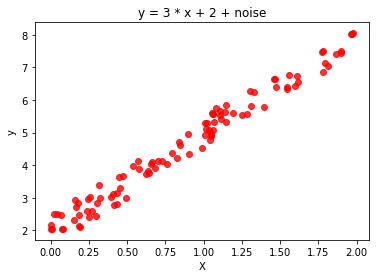

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 100)
X = np.random.uniform(0, 2, 100)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3 * x + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta + \eta \cdot (y - \hat{y}) \cdot x\\
b & = b + \eta \cdot (y - \hat{y})
\end{align*}$

这种一次只取一个数据，然后更新 $\theta$ 和 $b$ 的做法叫做 Stochastic Graident Descent。好处就是实现起来比较简单，缺点呢就是收敛比较慢。

In [2]:
theta = 0.01
b = 0.01
LEARNING_RATE = 0.01

EPOCH = 1000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=1)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * loss * sample_x
    b = b - LEARNING_RATE * loss

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -6.643921
EPOCH: 50, loss: -1.340117
EPOCH: 100, loss: -0.861218
EPOCH: 150, loss: -0.438509
EPOCH: 200, loss: 0.244765
EPOCH: 250, loss: -0.322309
EPOCH: 300, loss: 0.375060
EPOCH: 350, loss: -0.044464
EPOCH: 400, loss: 0.329030
EPOCH: 450, loss: 0.086273
EPOCH: 500, loss: 0.054212
EPOCH: 550, loss: -0.271594
EPOCH: 600, loss: 0.122360
EPOCH: 650, loss: -0.381395
EPOCH: 700, loss: 0.429958
EPOCH: 750, loss: 0.511822
EPOCH: 800, loss: 0.349873
EPOCH: 850, loss: 0.155876
EPOCH: 900, loss: 0.200163
EPOCH: 950, loss: -0.542154
theta is 2.898296, b is 2.070628


# Batch Gradient Descent

Batch Gradient Descent 和 Stochastic Gradient Descent 的差别在于一次读取一批数据，然后使用这批数据的均值 Gradient，作为下降的参数，这个时候的 Stochastic Gradient Descent 就需要稍作修改，也即

$\begin{align*}
\theta & = \theta - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i) \cdot x_i \\
b & = b - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i)
\end{align*}$

一个批次的数据是 N，均值 Gradient 的计算即为 $\frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i$

In [3]:
theta = 0.1
b = 0.1
LEARNING_RATE = 0.01

BATCH_SIZE = 32
EPOCH = 1000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * np.dot(loss, sample_x) / BATCH_SIZE
    b = b - LEARNING_RATE * np.sum(loss, 0) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -165.293041
EPOCH: 50, loss: -49.625866
EPOCH: 100, loss: -16.766646
EPOCH: 150, loss: -5.653305
EPOCH: 200, loss: -1.602798
EPOCH: 250, loss: 1.397563
EPOCH: 300, loss: 2.001680
EPOCH: 350, loss: 1.555903
EPOCH: 400, loss: 0.608109
EPOCH: 450, loss: -1.656105
EPOCH: 500, loss: 0.202753
EPOCH: 550, loss: -0.799259
EPOCH: 600, loss: 2.073588
EPOCH: 650, loss: 0.731998
EPOCH: 700, loss: -2.163560
EPOCH: 750, loss: 1.311191
EPOCH: 800, loss: 0.697853
EPOCH: 850, loss: 3.116401
EPOCH: 900, loss: 1.395278
EPOCH: 950, loss: 1.730805
theta is 2.901618, b is 2.095449


## 使用 Tensorflow 或者 PyTorch 实现

### PyTorch

类似于 numpy 的 torch，没有使用 AutoGrad

In [4]:
import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype)
b = torch.randn(1, 1, device=device, dtype=dtype)
LEARNING_RATE = 0.01

BATCH_SIZE = 32
EPOCH = 1000
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    theta -= LEARNING_RATE * (loss.mul(sample_x).sum()) / BATCH_SIZE
    b -= LEARNING_RATE * loss.sum() / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -137.647813
EPOCH: 50, loss: -43.202941
EPOCH: 100, loss: -14.579599
EPOCH: 150, loss: -5.052179
EPOCH: 200, loss: -1.520882
EPOCH: 250, loss: -1.399968
EPOCH: 300, loss: -2.103826
EPOCH: 350, loss: 0.641001
EPOCH: 400, loss: -3.121464
EPOCH: 450, loss: -1.131182
EPOCH: 500, loss: -0.923202
EPOCH: 550, loss: -1.841630
EPOCH: 600, loss: 1.551037
EPOCH: 650, loss: -1.764881
EPOCH: 700, loss: -1.553960
EPOCH: 750, loss: 0.745984
EPOCH: 800, loss: 2.203756
EPOCH: 850, loss: -0.104775
EPOCH: 900, loss: -1.031349
EPOCH: 950, loss: -1.456181
theta is 2.994412, b is 1.979987


如果使用 AutoGrad，上面的代码就会少掉一部分。在 torch 中，每一个 epoch 要把每一个变量的 grad 设为 0，不设为 0 的话，grad 会累计。

In [5]:
import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, device=device, dtype=dtype, requires_grad=True)
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 1000
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    loss.sum().pow(2).backward()

    with torch.no_grad():
        theta -= LEARNING_RATE * theta.grad
        b -= LEARNING_RATE * b.grad

        # Manually zero the gradients after updating weights
        theta.grad.zero_()
        b.grad.zero_()

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -38.958320
EPOCH: 50, loss: -22.314174
EPOCH: 100, loss: -9.015490
EPOCH: 150, loss: -3.828260
EPOCH: 200, loss: -6.373519
EPOCH: 250, loss: -2.344324
EPOCH: 300, loss: -2.227498
EPOCH: 350, loss: -2.151360
EPOCH: 400, loss: -0.523317
EPOCH: 450, loss: -0.057885
EPOCH: 500, loss: -0.573490
EPOCH: 550, loss: -0.761258
EPOCH: 600, loss: -1.793254
EPOCH: 650, loss: -0.872333
EPOCH: 700, loss: -2.107632
EPOCH: 750, loss: 0.572732
EPOCH: 800, loss: 0.413955
EPOCH: 850, loss: 2.523008
EPOCH: 900, loss: -2.738922
EPOCH: 950, loss: 1.034521
theta is 3.693678, b is 1.243693


### Tensorflow

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow.keras import layers

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
AUTOTUNE = tf.data.experimental.AUTOTUNE

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
EPOCH = 100

dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

linear_regression = tf.keras.Sequential()
linear_regression.add(layers.Dense(1, use_bias=True))

linear_regression_input = layers.Input(shape=(1,))
linear_regression_model = tf.keras.Model(inputs=linear_regression_input, outputs=linear_regression(linear_regression_input))

linear_regression_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['mse'])
linear_regression_model.fit(dataset, epochs=EPOCH)

print(linear_regression_model.get_weights())

Epoch 1/100
4/4 [==============================] - 1s 147ms/step - loss: 38.2782 - mse: 38.0258
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 25.5054 - mse: 25.4503
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 17.3838 - mse: 17.1883
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 12.0275 - mse: 11.9103
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 8.3130 - mse: 8.2211
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 5.8022 - mse: 5.7437
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 4.0502 - mse: 3.9754
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8587 - mse: 2.8514
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9859 - mse: 1.9845
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4106 - mse: 1.3834
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - los

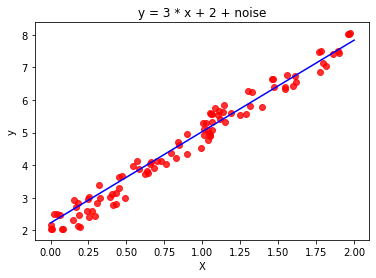

In [8]:
x = np.linspace(0,2,100)
hat_y = 2.8044658*x+2.2277365
plt.scatter(X, y, alpha=0.8, c='red')
plt.plot(x, hat_y, '-b', label='y = 2.8044658 * x + 2.2277365')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3 * x + 2 + noise')
plt.show()
plt.close()